In [2]:
!pip install tensorflow  mediapipe matplotlib 
    

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
colors = [(245,117,16), (117,245,16), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245), (16,117,245)]
def prob_viz (res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [8]:
def draw_styled_landmarks (image, results):
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR )
    image.flags.wrietable = False
    results = model.process(image)
    image.flags.wrietble = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [10]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

I0000 00:00:1722870681.933090   13684 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722870681.963438   13684 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722870681.963655   13684 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722870681.965390   13684 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [13]:
import numpy as np
import os

def load_data(data_dir):
    X = []
    y = []

    # Iterar sobre todas las carpetas de frutas
    for fruit_dir in os.listdir(data_dir):
        fruit_dir_path = os.path.join(data_dir, fruit_dir)
        if not os.path.isdir(fruit_dir_path):
            continue

        # Iterar sobre todas las subcarpetas dentro de la carpeta de fruta
        for subdir in os.listdir(fruit_dir_path):
            subdir_path = os.path.join(fruit_dir_path, subdir)
            if not os.path.isdir(subdir_path):
                continue

            # Iterar sobre todos los archivos .npy dentro de la subcarpeta
            for archivo in os.listdir(subdir_path):
                if not archivo.endswith('.npy'):
                    continue

                archivo_path = os.path.join(subdir_path, archivo)
                frames = np.load(archivo_path)

                # Agregar los datos y las etiquetas a las listas X y y
                X.append(frames)
                y.append(fruit_dir)

    return np.array(X), np.array(y)

# Ruta a la carpeta raíz que contiene las carpetas de frutas
data_dir = '/home/fabrica/anaconda3/envs/linkproject_ia/fruit-model'

# Cargar los datos
X, y = load_data(data_dir) 

# Verificar la carga de datos
if X.size == 0 or y.size == 0:
    raise ValueError("No se han cargado datos. Verifica las rutas y los archivos.")

print(f"Datos cargados: {len(X)} muestras")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Número de clases: {len(np.unique(y))}")

Datos cargados: 15000 muestras
Forma de X: (15000, 1662)
Forma de y: (15000,)
Número de clases: 10


In [30]:
np.array(sequences).shape

NameError: name 'sequences' is not defined

In [29]:
print (sequence)

NameError: name 'sequence' is not defined

In [14]:
import numpy as np
actions = np.array([ 'Aguacate','banano','coco','durazno','fresa','manzana','mora','naranja','papaya','piña'])
print(actions)

['Aguacate' 'banano' 'coco' 'durazno' 'fresa' 'manzana' 'mora' 'naranja'
 'papaya' 'piña']


In [15]:
print(X.dtype)

float64


In [16]:

import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy

# Supongamos que X y y son tus datos de entrada y etiquetas respectivamente

# Asegúrate de que las etiquetas sean enteros
le = LabelEncoder()
y = le.fit_transform(y)




In [17]:
from tensorflow.keras.layers import Input

# Obtener la forma de entrada y el número de clases
input_shape = (X.shape[1],)
num_classes = len(np.unique(y))

# Definir el modelo
model = Sequential([
    Input(shape=input_shape),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [18]:
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['accuracy'])

In [19]:
history = model.fit(X, y, epochs=150, validation_data=(X, y))

Epoch 1/150


I0000 00:00:1722870685.065148   13824 service.cc:146] XLA service 0x7ba4b4005040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722870685.065180   13824 service.cc:154]   StreamExecutor device (0): NVIDIA T1000 8GB, Compute Capability 7.5
2024-08-05 10:11:25.128518: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-05 10:11:25.216226: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  1/469 ━━━━━━━━━━━━━━━━━━━━ 10:12 1s/step - accuracy: 0.0000e+00 - loss: 2.7139

2024-08-05 10:11:25.805394: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
I0000 00:00:1722870685.955195   13824 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2376 - loss: 2.0702 - val_accuracy: 0.4689 - val_loss: 1.5635
Epoch 2/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4993 - loss: 1.4943 - val_accuracy: 0.6063 - val_loss: 1.2171
Epoch 3/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5951 - loss: 1.2072 - val_accuracy: 0.6349 - val_loss: 1.0648
Epoch 4/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6473 - loss: 1.0418 - val_accuracy: 0.7037 - val_loss: 0.9177
Epoch 5/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6968 - loss: 0.9120 - val_accuracy: 0.7020 - val_loss: 0.8616
Epoch 6/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7051 - loss: 0.8652 - val_accuracy: 0.7589 - val_loss: 0.7643
Epoch 7/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7517 - loss: 0.7584 - val_accuracy: 0.7799 - val_loss: 0.6851
Epoch 8/150
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7627 - loss: 0.7188 - val_accuracy: 0.8065

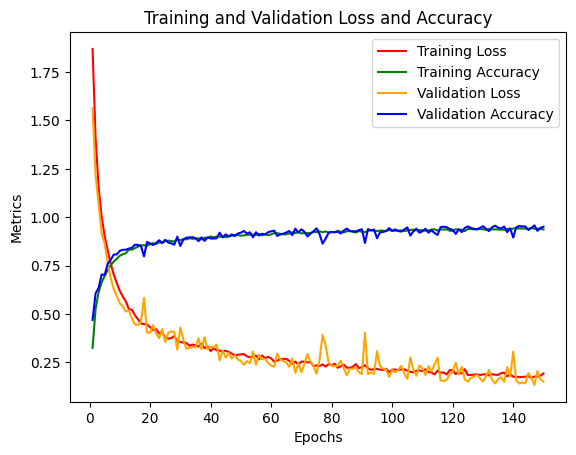

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
epochs = range(1, len(loss) + 1)

acc = history.history['accuracy']

plt.plot(epochs, loss, 'red', label='Training Loss')
plt.plot(epochs, acc, 'green', label='Training Accuracy')  
# Verificar si 'val_loss' está en el historial
if 'val_loss' in history.history:
    val_loss = history.history['val_loss']
    plt.plot(epochs, val_loss, 'orange', label='Validation Loss')

# Verificar si 'val_accuracy' está en el historial
if 'val_accuracy' in history.history:
    val_acc = history.history['val_accuracy']
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')  

plt.title('Training and Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       106,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,728 (1.27 MB)

 Trainable params: 111,242 (434.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,486 (869.09 KB)

In [26]:
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9527 - loss: 0.1431
Loss: 0.14995034039020538, Accuracy: 0.9503333568572998


In [27]:
model.save('mi_modelo3.5.h5')


In [24]:
results= []
result_test = extract_keypoints(results)

AttributeError: 'list' object has no attribute 'pose_landmarks'

In [28]:
import tensorflow as tf

# Cargar el modelo
model = tf.keras.models.load_model('mi_modelo5.h5')
    

/home/fabrica/anaconda3/envs/test/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/fabrica/anaconda3/envs/test/lib/python3.9/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1722870587.503001    5357 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1722870587.540154   13577 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.183.01), renderer: NVIDIA T1000 8GB/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1722870587.597101   13560 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722870587.617119   13572 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722870587.670502   13576 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1722870587.670508   13564 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Di

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 30, 1662), dtype=float32). Expected shape (None, 1662), but input has incompatible shape (1, 30, 1662)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 30, 1662), dtype=float32)
  • training=False
  • mask=None

: 